In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
df = pd.read_csv('Chapter1_cleand_data.csv')
df.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [2]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values, test_size =0.2, random_state = 24)

In [3]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(C= 0.1, solver = 'liblinear')
lr1

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
lr1.fit(x1_train, y1_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
y1_pred = lr1.predict(x1_test)

In [6]:
from sklearn import metrics
metrics.accuracy_score(y1_test, y1_pred)

0.7834239639977498

In [7]:
y1_pred_proba = lr1.predict_proba(x1_test)
y1_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [8]:
pos1_proba = y1_pred_proba[:, 1]
pos1_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

In [9]:
fpr, tpr, threashold = metrics.roc_curve(y1_test,pos1_proba )

Text(0.5, 1.0, 'ROC curve')

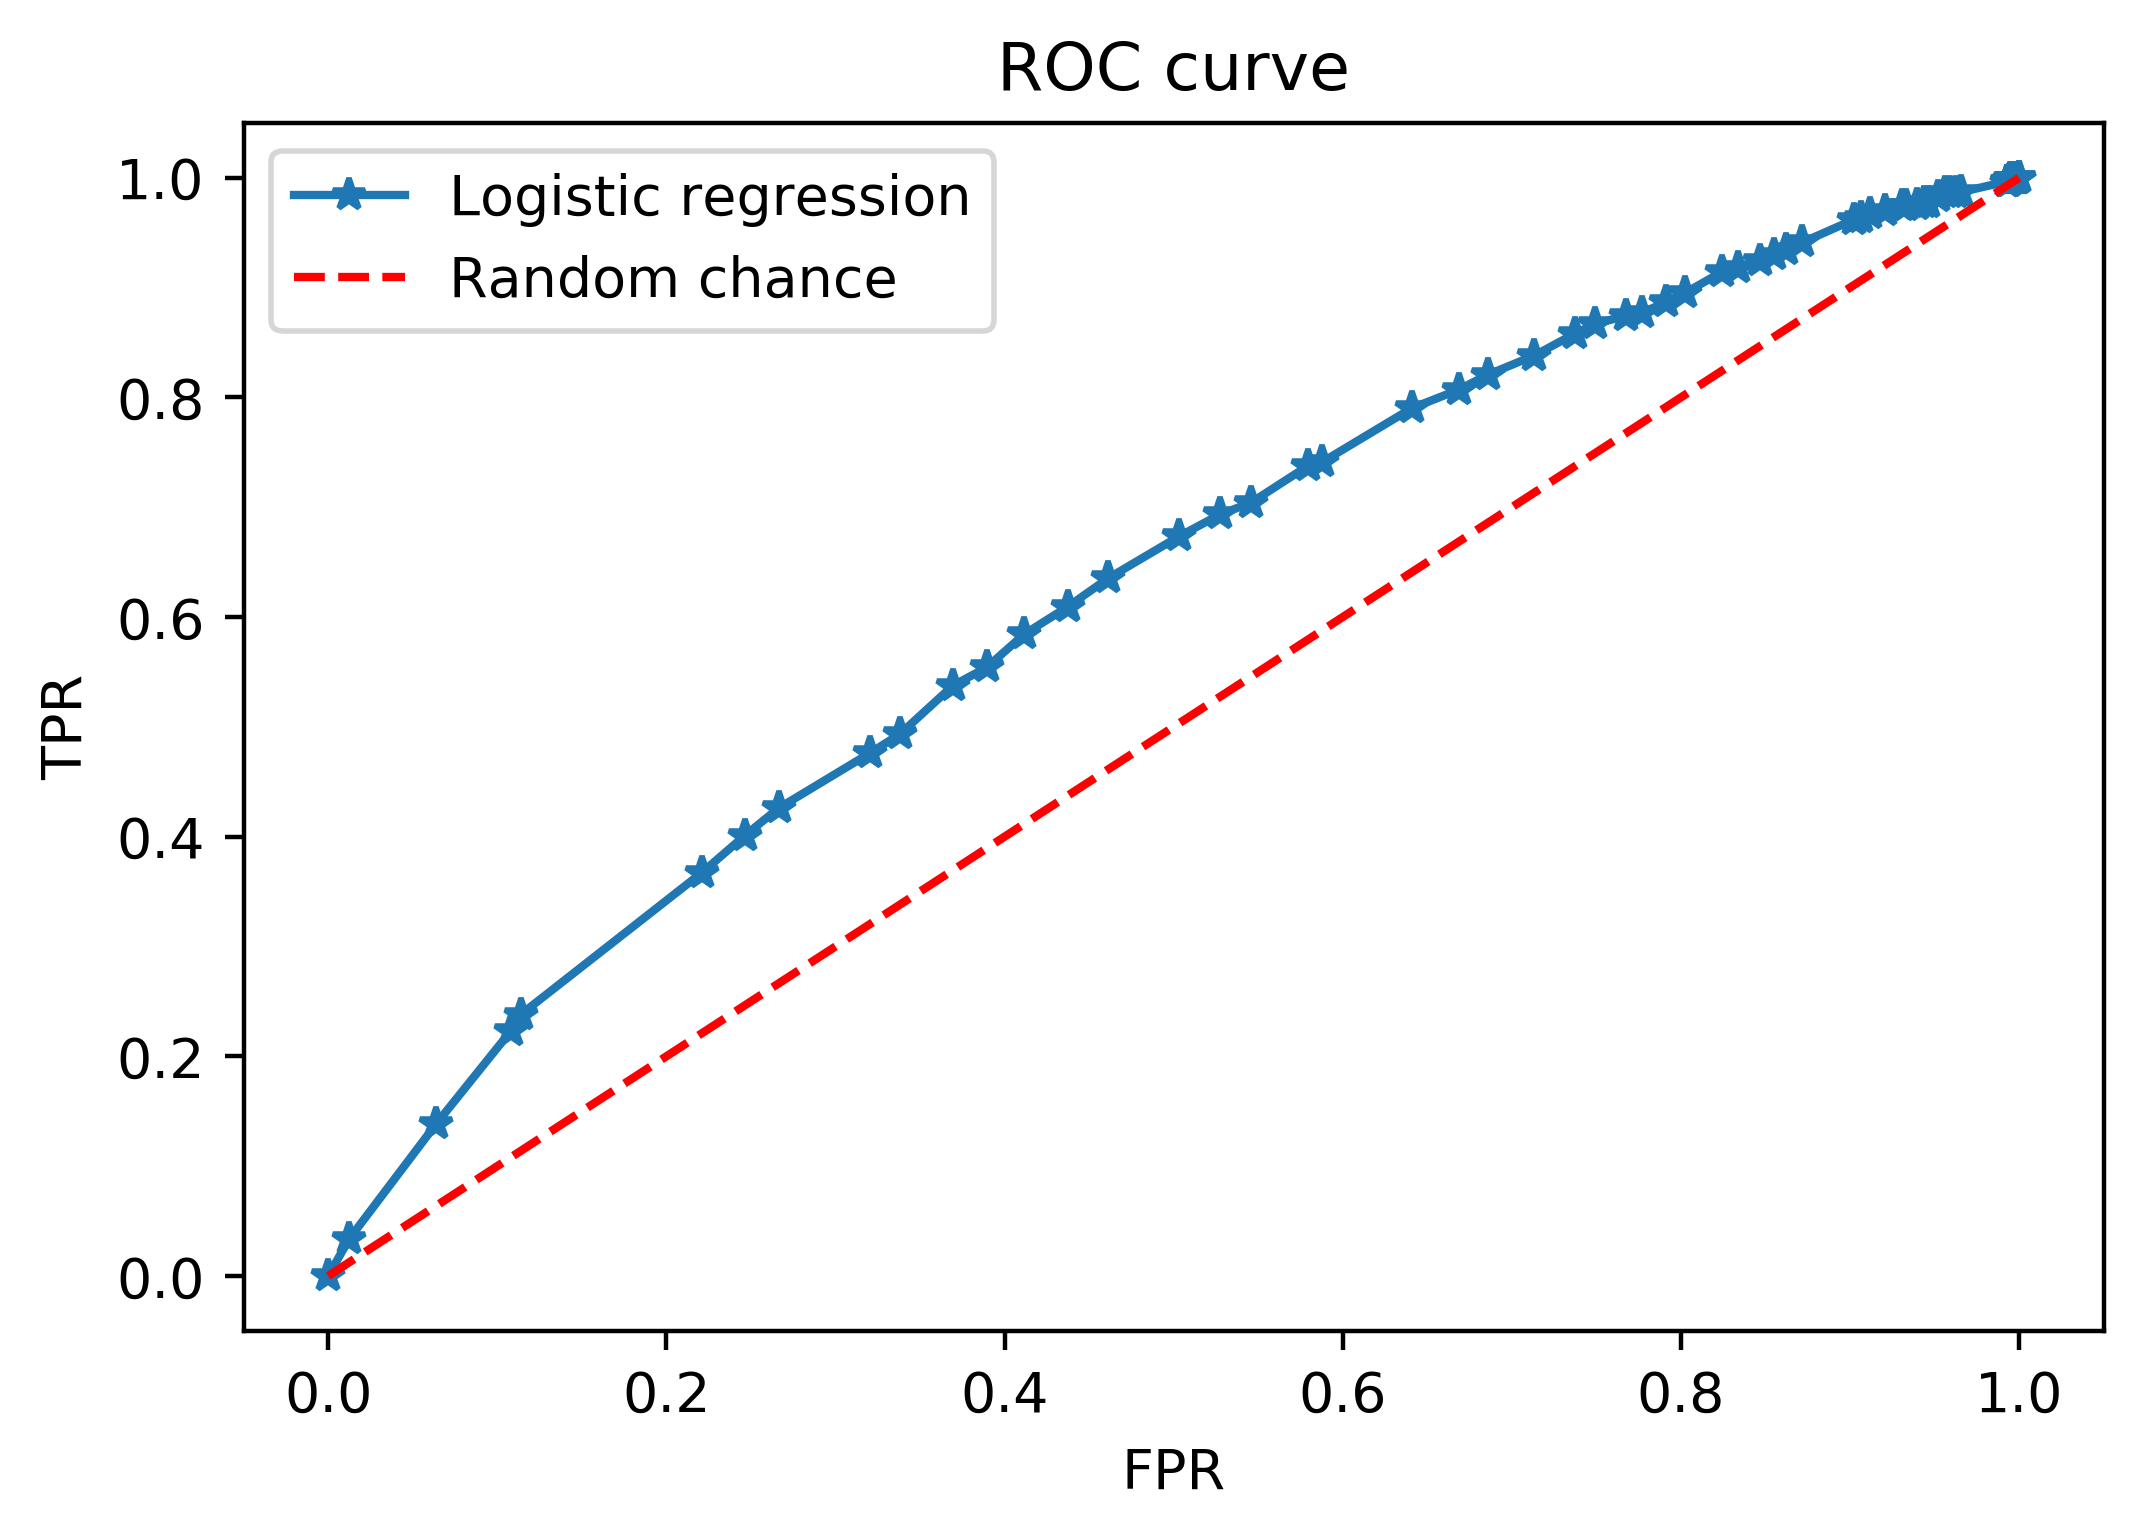

In [10]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1],[0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')


In [16]:
metrics.roc_auc_score(y1_test, pos1_proba)

0.6201990844642832

In [17]:
precision, recall, threashold = metrics.precision_recall_curve(y1_test, pos1_proba)

(0.0, 1.0)

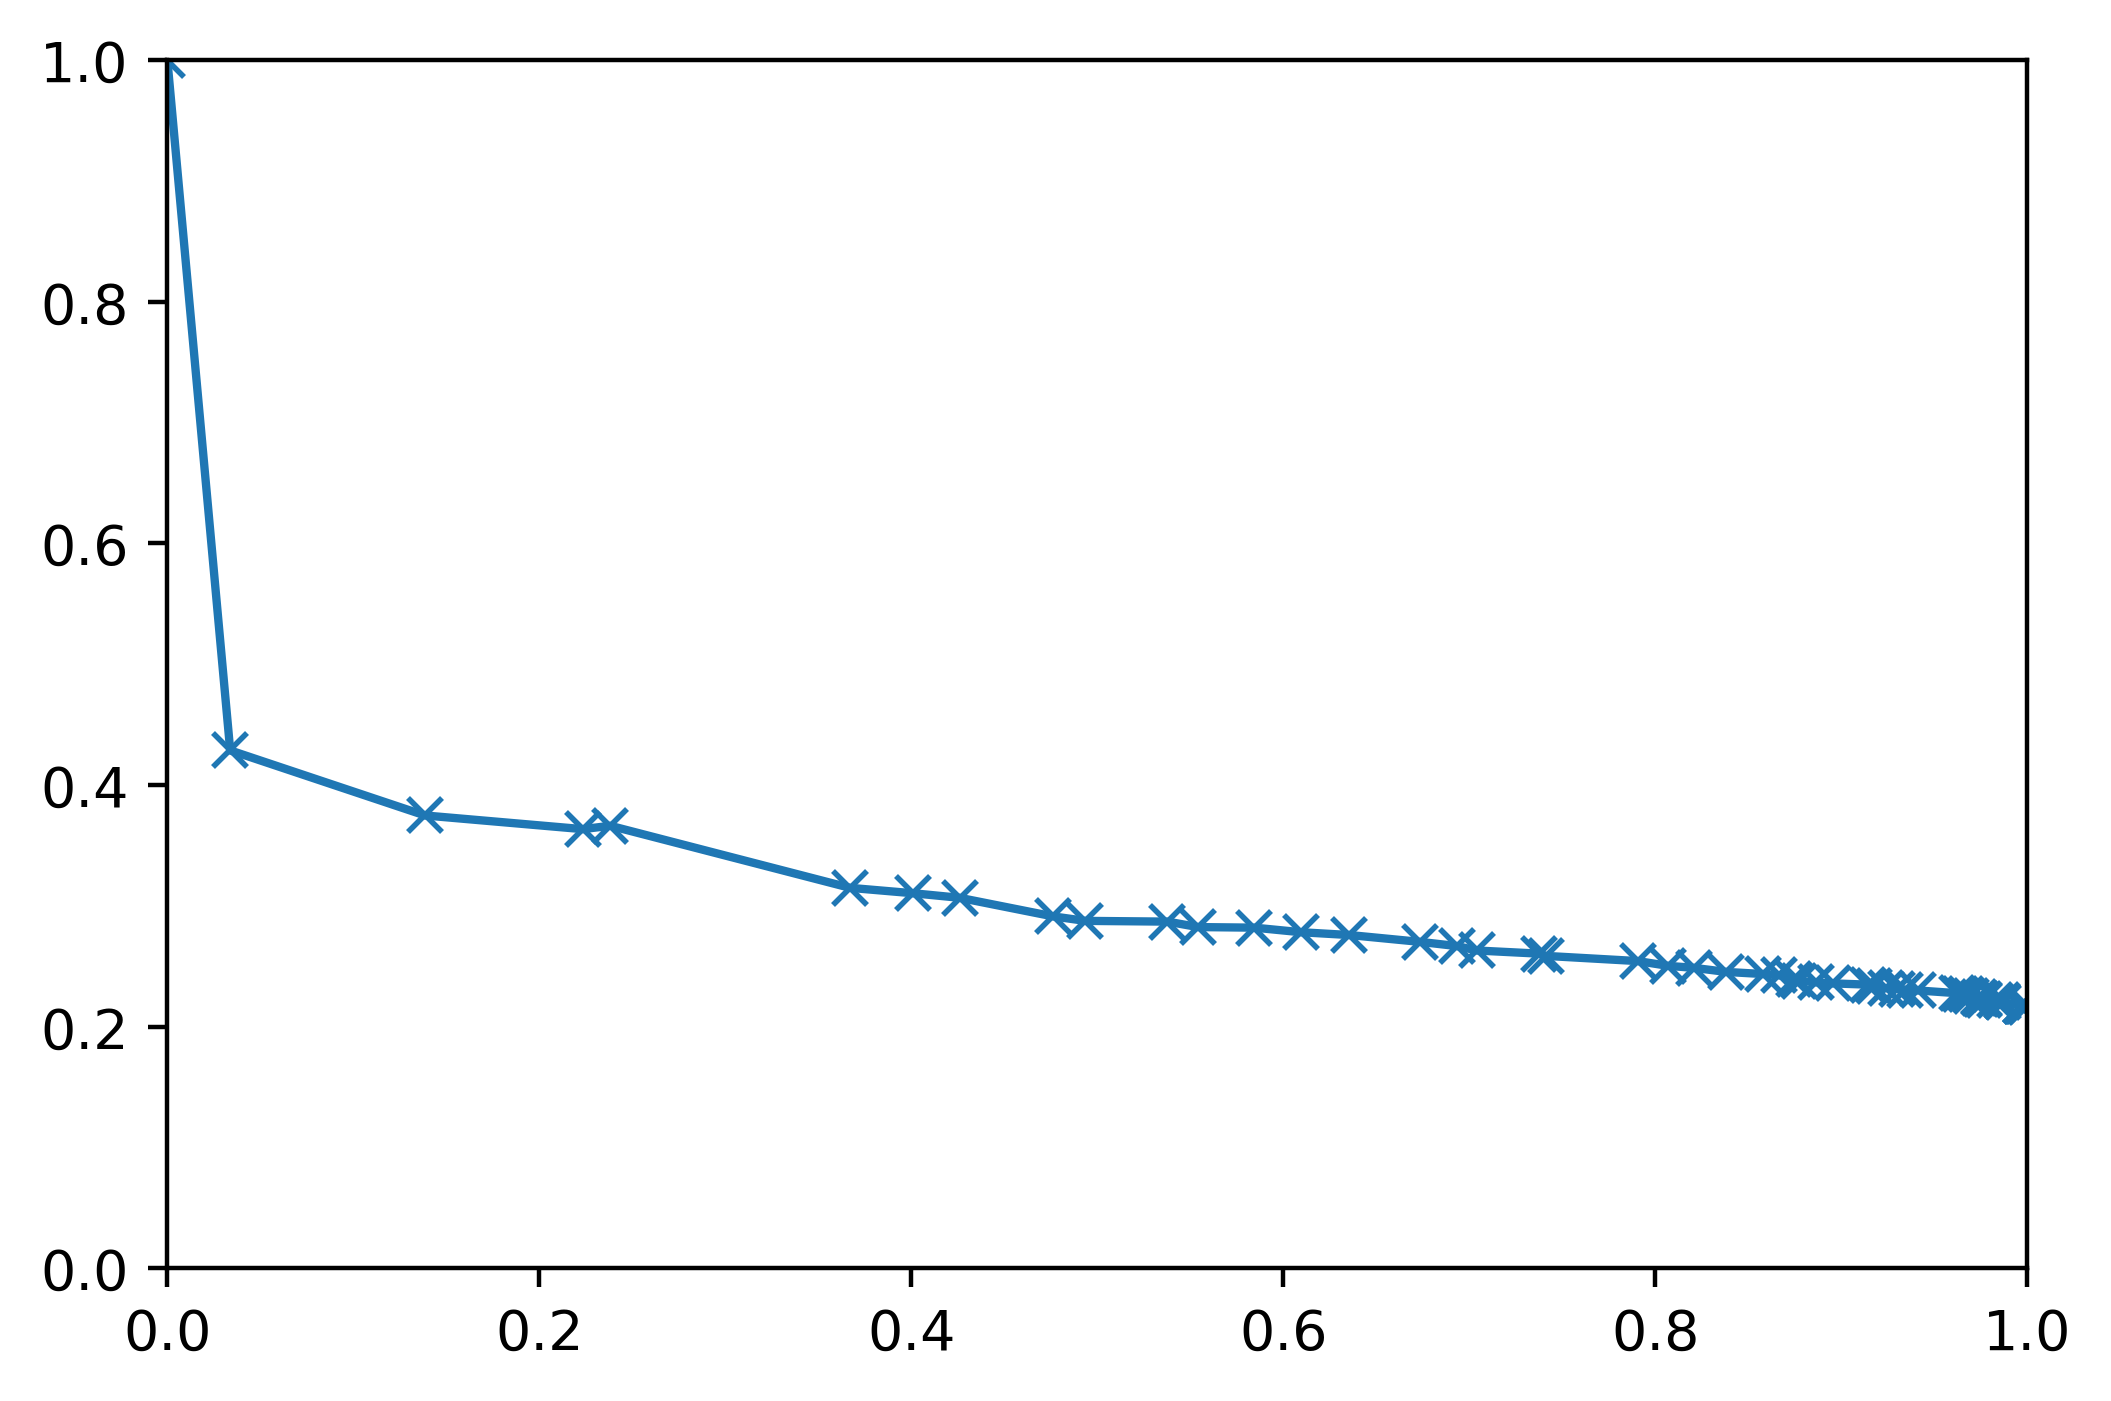

In [18]:
plt.plot(recall, precision, '-x')
#plt.xlabel('Recall')
#plt.ylabel('Precsion')
#plt.title ('Precision Recall Curve with LIMIT_BAL')
plt.xlim([0,1])
plt.ylim([0,1])


In [39]:
metrics.auc(recall, precision)

0.31566964427378624

In [33]:
y2_pred_proba = lr1.predict_proba(x1_train)
y2_pred_proba

array([[0.69361022, 0.30638978],
       [0.78476701, 0.21523299],
       [0.94581702, 0.05418298],
       ...,
       [0.55088894, 0.44911106],
       [0.73522868, 0.26477132],
       [0.92064596, 0.07935404]])

In [34]:
pos2_proba = y2_pred_proba[:, 1]
pos2_proba

array([0.30638978, 0.21523299, 0.05418298, ..., 0.44911106, 0.26477132,
       0.07935404])

In [38]:
fpr, tpr, threashold = metrics.roc_curve(y1_train,pos2_proba )

TypeError: 'str' object is not callable

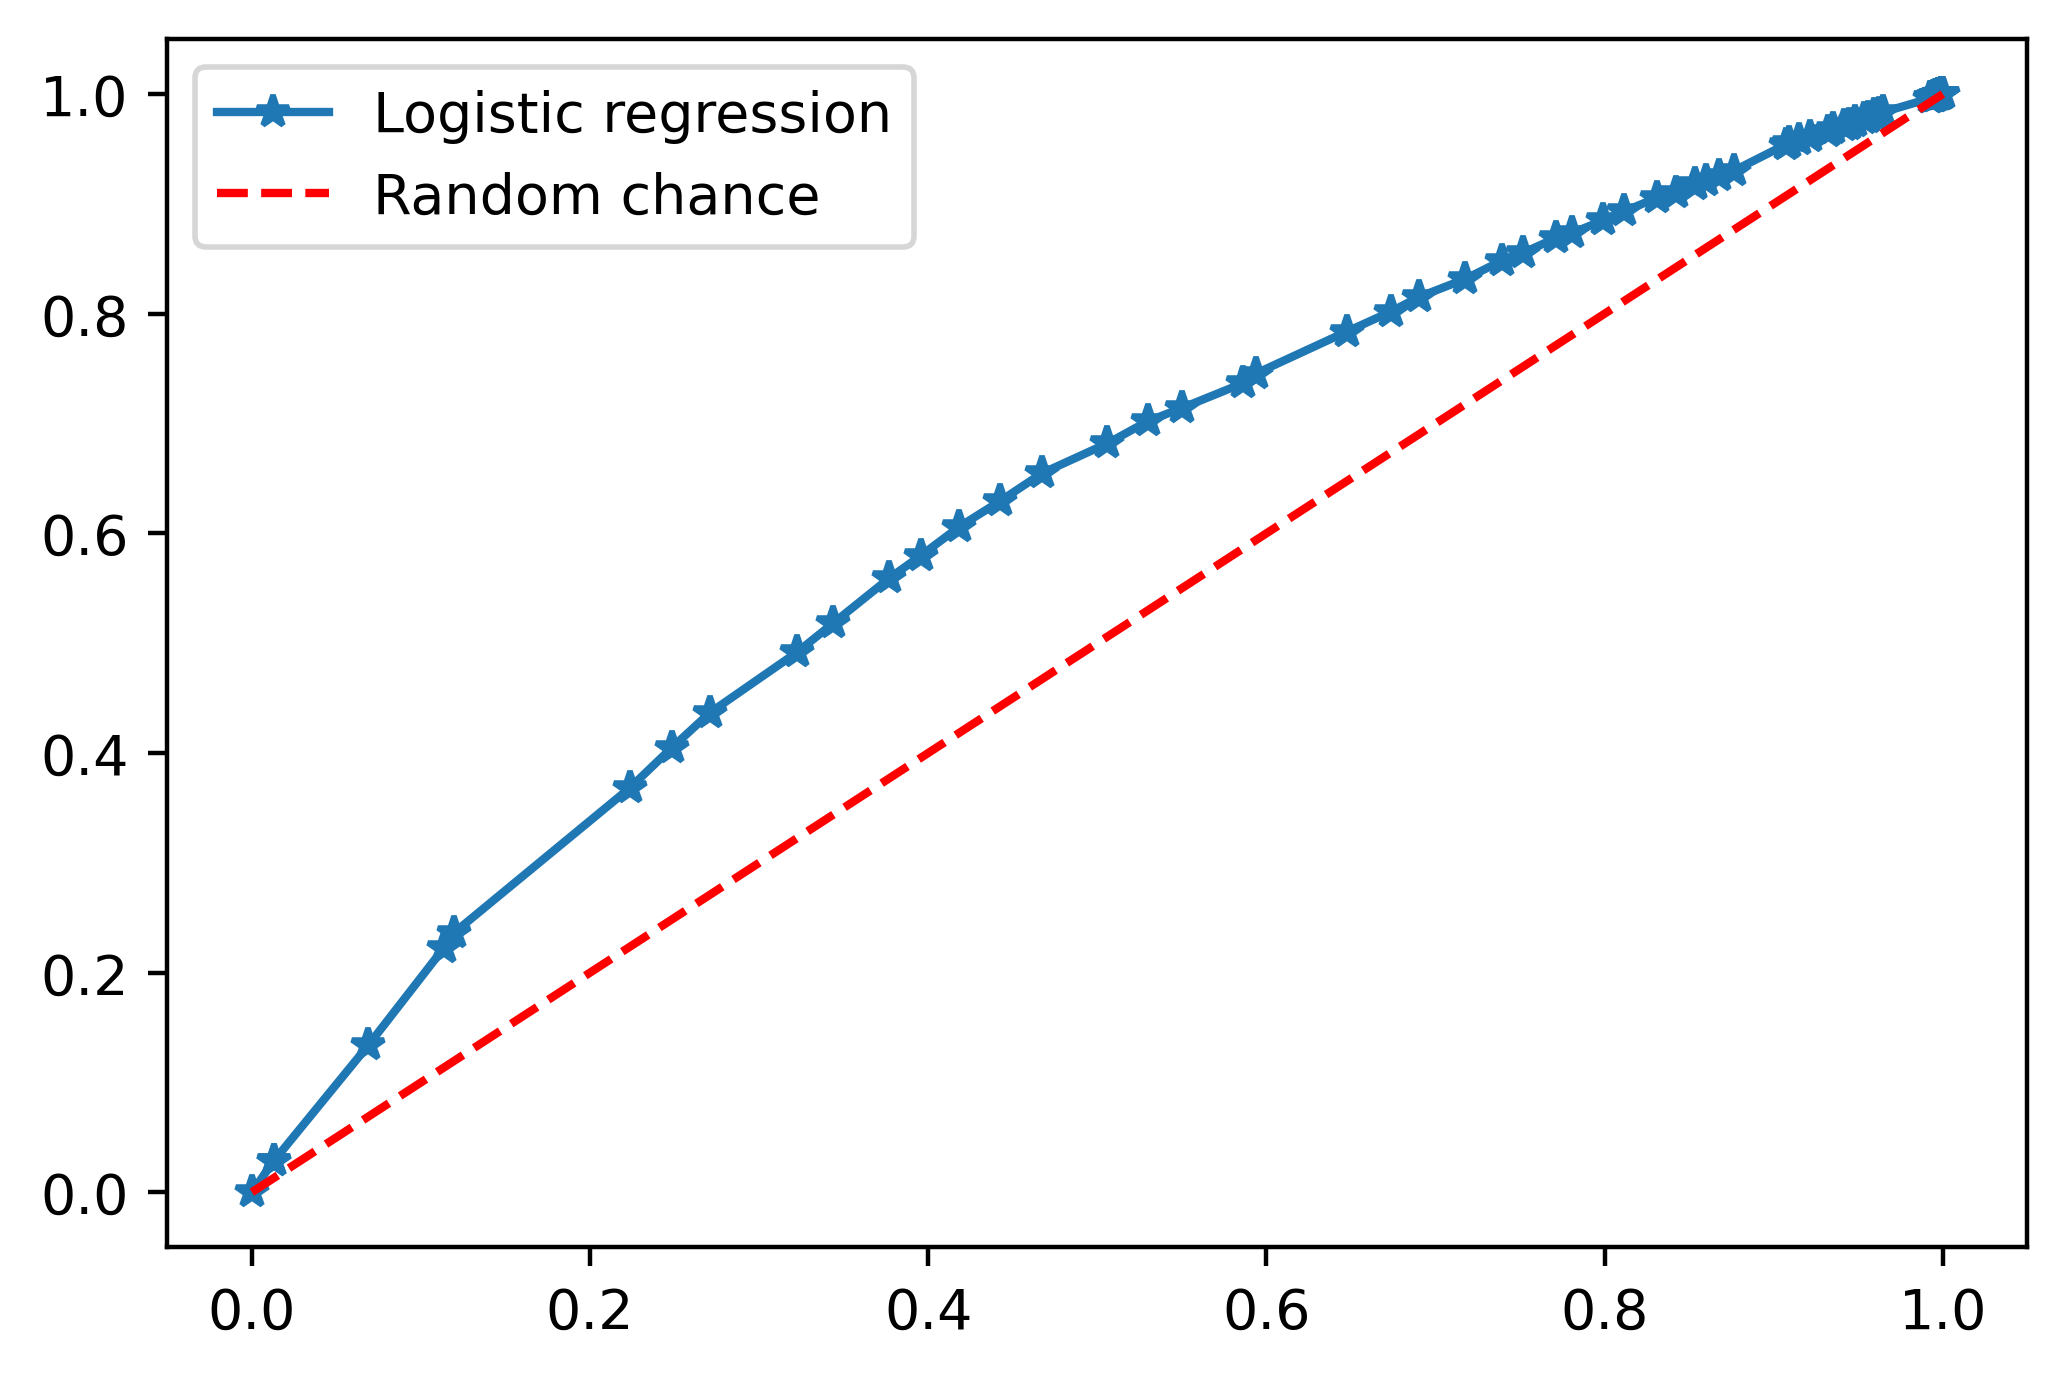

In [39]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1],[0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
